In [63]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')

In [64]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values

In [65]:
mean_fare = np.round(np.mean(fare_values))
print(f'Wartość średniej wynosi: {mean_fare}')

Wartość średniej wynosi: 32.0


In [66]:
median_fare = np.round(np.median(fare_values))
print(f'Wartość mediany wynosi: {median_fare}')

Wartość mediany wynosi: 14.0


In [67]:
mode_fare = stats.mode(fare_values)
print(f'Wartość mody wynosi: {mode_fare}')

Wartość mody wynosi: ModeResult(mode=array([8.05]), count=array([43]))


In [68]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.0
Q3: 31.0
Q4: 512.0


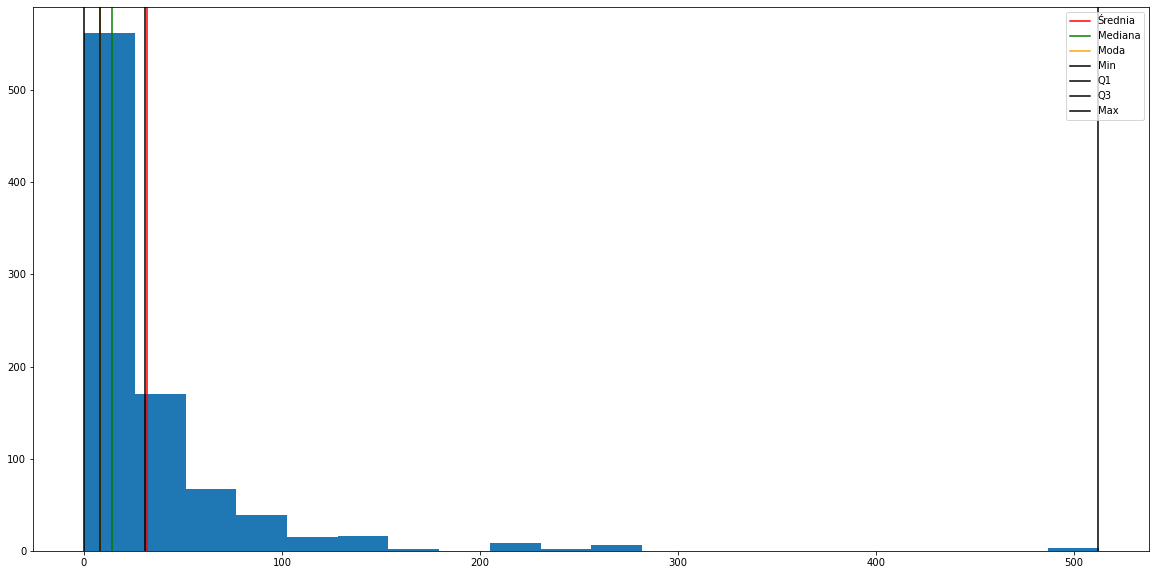

In [69]:
plt.figure(figsize=(20,10))
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

W podanej próbie, największy odestek kwoty opłaty klasuje się w najniższym przediale cenowym czyli do 100£ a średnia opłata wynosiła 32£.

In [70]:
range_fare = max(fare_values) - min(fare_values)
print(f'Wartość zakresu wynosi: {range_fare}')

Wartość zakresu wynosi: 512.3292


In [71]:
iqr = q3 - q1
print(f'Rozstęp międzykwartylowy wynosi :{iqr}')

Rozstęp międzykwartylowy wynosi :23.0


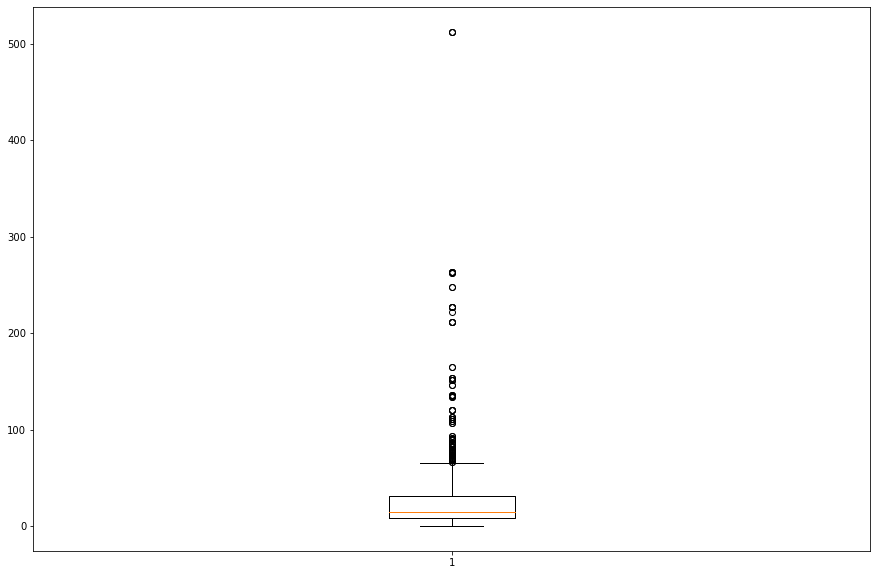

In [72]:
plt.figure(figsize=(15,10))
plt.boxplot(fare_values)
plt.show()

Większość wartości znajduje się w przediale 0-80. Można rozważyć wyfiltorwanie tego przedziału.

In [73]:
variance_fare = np.var(fare_values, ddof=1)
print(f'Wariancja wynosi: {variance_fare}')

Wariancja wynosi: 2469.436845743116


In [74]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(f'Odchylenie standardowe wynosi: {standard_deviation_fare}')

Odchylenie standardowe wynosi: 49.6934285971809


In [75]:
class_values = dataset.loc[dataset['Pclass'].notnull(), 'Pclass'].values

print(np.round(stats.pearsonr(fare_values, class_values), 3))
print('Korelacja pomiędzy wartością opłaty a klasą pasażera wynosi ~ -55 %')

[-0.549  0.   ]
Korelacja pomiędzy wartością opłaty a klasą pasażera wynosi ~ -55 %
